In [1]:
'''Loading in required libraries for code'''


from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc, roc_curve,accuracy_score,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns
sns.set_theme()
sns.set_context("paper")

In [2]:
'''Loading in the train and testing data sets from kaggle'''

test_data = pd.read_csv('../exoTrain.csv')
train_data = pd.read_csv('../exoTrain.csv')

In [4]:
'''The Labels are 2 for exoplanet and 1 for non exoplanet so we have to switch them to 2->1 and 1->0'''

new_labels_test = []
for i in test_data['LABEL']:
    if i == 2:
        new_labels_test.append(1)
        
    if i == 1:
        new_labels_test.append(0)

test_data = test_data.drop(columns= ['LABEL'])
test_data.insert(0, 'NEW_LABEL', new_labels_test)

In [5]:
'''For both datasets'''

new_labels_train = []
for i in train_data['LABEL']:
    if i == 2:
        new_labels_train.append(1)
        
    if i == 1:
        new_labels_train.append(0)

train_data = train_data.drop(columns= ['LABEL'])
train_data.insert(0, 'NEW_LABEL', new_labels_train)

In [7]:
'''Remove outliers, shown by scatter plot; removed by IQR or another method'''

'Remove outliers, shown by scatter plot; removed by IQR or another method'

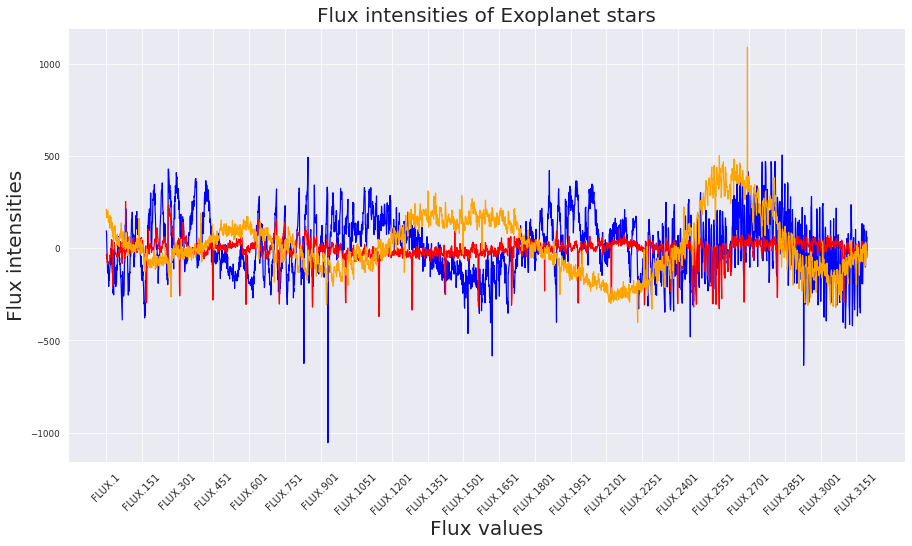

In [26]:
'''Observing the intensity of flux values from training data of exoplanets vs non exoplanets 5 of each'''

plt.figure(figsize = (15,8))
plt.title('Flux intensities of Exoplanet stars', size = 20)

#Exoplanet ones
plt.plot(train_data.iloc[0,1:], color = 'blue')
plt.plot(train_data.iloc[1,1:], color = 'red')
plt.plot(train_data.iloc[5,1:], color = 'orange')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 10)

plt.show()

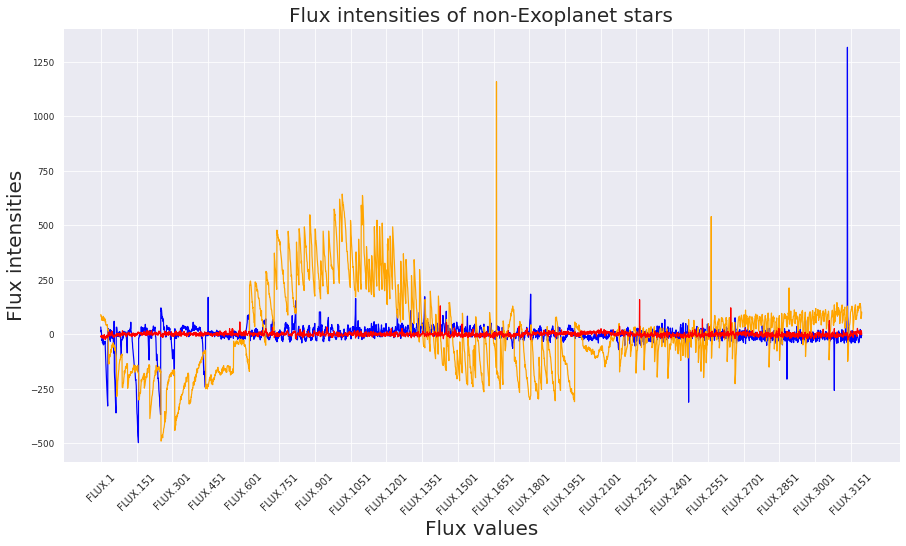

In [27]:
plt.figure(figsize = (15,8))
plt.title('Flux intensities of non-Exoplanet stars', size=20)

plt.plot(train_data.iloc[211,1:], color = 'blue')
plt.plot(train_data.iloc[400,1:], color = 'orange')
plt.plot(train_data.iloc[500,1:], color = 'red')

plt.xlabel('Flux values', size = 20)
plt.ylabel('Flux intensities', size = 20)
plt.xticks(rotation = 45, ticks = np.arange(0,3197,150), size = 10)
plt.show()

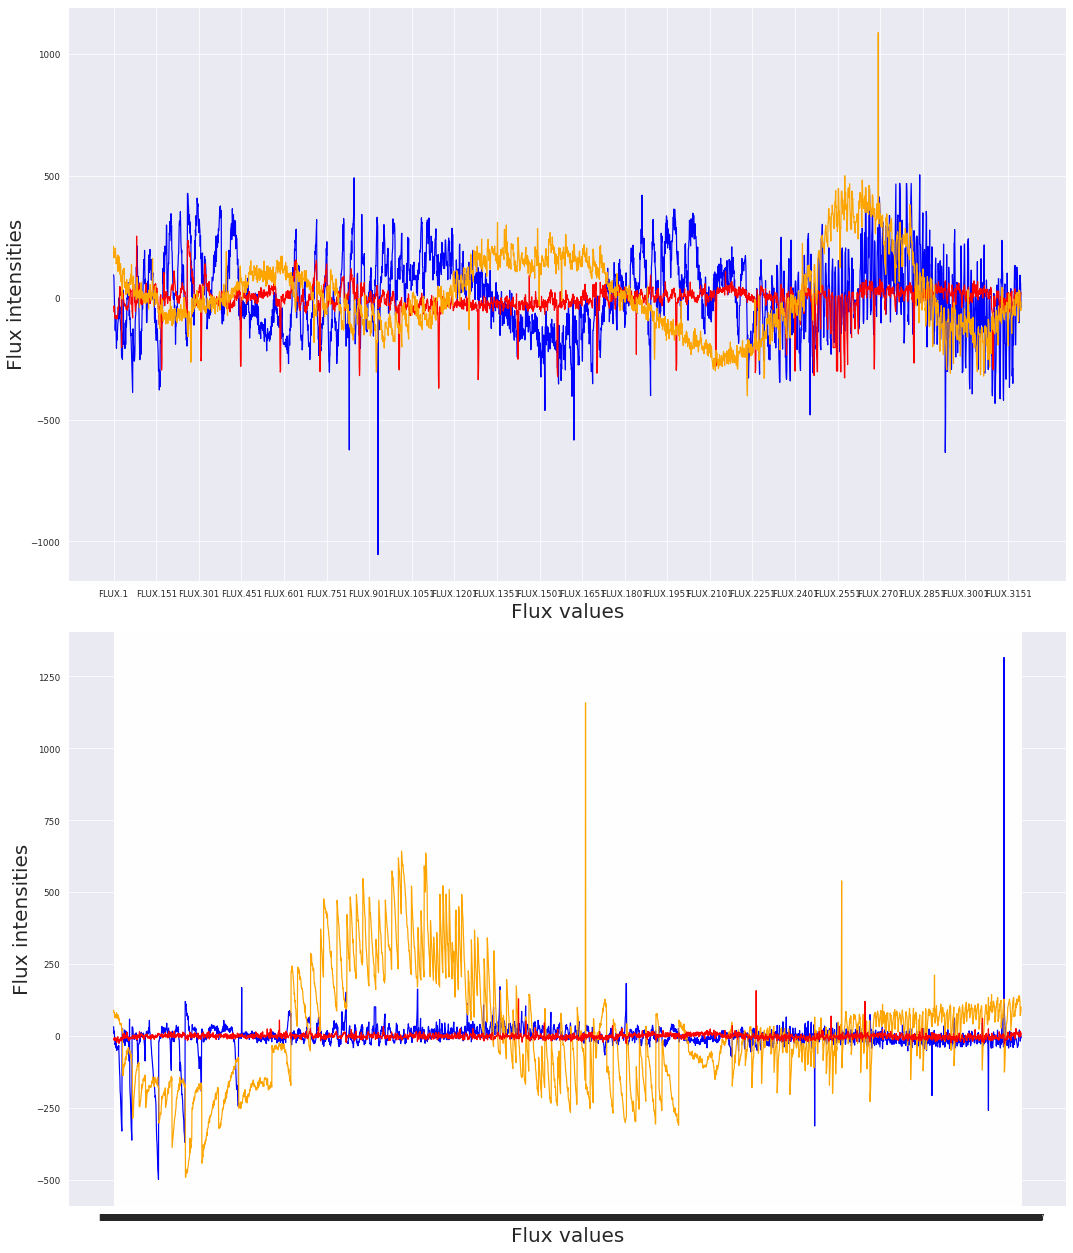

In [43]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15,17.5))

#Code for Exoplanets
axs[0].plot(train_data.iloc[0,1:], color = 'blue')
axs[0].plot(train_data.iloc[1,1:], color = 'red')
axs[0].plot(train_data.iloc[5,1:], color = 'orange')
axs[0].set_xlabel('Flux values', size = 20)
axs[0].set_ylabel('Flux intensities', size = 20)
axs[0].set_xticks(ticks = np.arange(0,3197,150), size = 25, rotation = 45)

#Code for Non-Exoplanets
axs[1].plot(train_data.iloc[211,1:], color = 'blue')
axs[1].plot(train_data.iloc[400,1:], color = 'orange')
axs[1].plot(train_data.iloc[500,1:], color = 'red')
axs[1].set_xlabel('Flux values', size = 20)
axs[1].set_ylabel('Flux intensities', size = 20)

plt.tight_layout()
plt.show()

In [10]:
'''Splitting the data into labels and features for both training and testing sets'''

train_fluxes = train_data.drop(columns = ['NEW_LABEL'])

train_labels = train_data['NEW_LABEL']

test_fluxes = test_data.drop(columns = ['NEW_LABEL'])

test_labels = test_data['NEW_LABEL']

In [11]:
'''Normalizing the data'''

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()

train_scaler.fit(train_fluxes) #for 
norm_train_fluxes = train_scaler.transform(train_fluxes)

test_scaler = MinMaxScaler()

test_scaler.fit(test_fluxes)
norm_test_fluxes = test_scaler.transform(train_fluxes)

In [12]:
'''Applying Guassian Filter'''

train_fluxes = ndimage.filters.gaussian_filter(norm_train_fluxes, sigma = 10)

test_fluxes = ndimage.filters.gaussian_filter(norm_test_fluxes, sigma = 10)

In [13]:
'''May need to apply feature scaler unsure at the moment'''

'May need to apply feature scaler unsure at the moment'

In [14]:
'''PCA on data'''



'PCA on data'